# Abstract  
The goal of this project is to develop a machine learning model for the *Film Junky Union* community that can automatically detect negative reviews in a movie review dataset. This system will help filter and categorize reviews, improving the experience for platform users. Several classification models will be used, and their performance will be evaluated with the aim of achieving an F1 score of at least 0.85 in identifying negative reviews.

# Introduction

**Context**  

Film Junky Union is an emerging community for classic movie enthusiasts, focused on sharing opinions and movie analysis. In order to improve the quality of the available content, the platform seeks an efficient way to filter negative reviews. This will allow administrators to track opinions accurately and generate recommendations based on the general acceptance of movies.

**Problem**  

Currently, review moderation is a manual process and often time-consuming. Automating the detection of negative reviews would enable Film Junky Union to improve the quality of its service by providing automatic filters and movie recommendations based on user ratings.

**Objectives**  

The main objective of this project is to develop a machine learning model that can classify reviews as positive or negative, with a focus on achieving an F1 score of at least 0.85 for negative reviews on the test set.

**Approach**  

To achieve the objectives, the following steps will be followed:

1. **Data Loading and Preprocessing**: The data will be analyzed and adjusted by reviewing the text to remove irrelevant characters or symbols and performing class balance analysis.
2. **Data Exploration**: The distribution of the data will be examined, and relevant patterns in movie reviews will be explored.
3. **Model Training**: Classification models such as logistic regression and gradient boosting models will be tested, along with approaches based on text embeddings.
4. **Model Evaluation**: The models will be evaluated using the F1 score, and comparisons will be made to select the most effective one.
5. **Hyperparameter Optimization**: Hyperparameters will be adjusted to maximize the accuracy and F1 score of the final model.
6. **Conclusion**: The best performing model will be selected, and its applications for negative review detection on the platform will be discussed.

**Dataset Description**  

The provided dataset contains movie reviews from IMDb, with the following structure:

- `review`: The text of the review.
- `pos`: The review label ('0' for negative and '1' for positive).
- `ds_part`: Indicates whether the data is for training or testing.


# Table of Contents <a id='back'></a>

* [1. Initialization](#Initialization)
* [2. Data Loading](#Data_Loading)
* [3. Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis)
* [4. Processing for Evaluation](#Processing_for_Evaluation)
* [5. Normalization](#Normalization)
* [6. Train-Test Split](#Train_Test_Split)
* [7. Model Work](#Model_Work)  
    * [7.1. Model 0 - Constant](#Model_0_-_Constant)  
    * [7.2. Model 1 - NLTK, TF-IDF and Logistic Regression (LR)](#Model_1_-_NLTK_TF-IDF_and_Logistic_Regression_LR)  
    * [7.3. Model 2 - spaCy, TF-IDF and LGBMClassifier](#Model_2_-_spaCy_TF-IDF_and_LGBMClassifier)  
    * [7.4. Model 3 - spaCy, TF-IDF and Logistic Regression (LR)](#Model_3_-_spaCy_TF-IDF_and_Logistic_Regression_LR)  
    * [7.5. Model 4 - BERT](#Model_4_-_BERT)
* [8. Test Review Classification](#Test_Review_Classification)  
    * [8.1. My Reviews - Evaluating Models on Custom Examples](#My_Reviews_-_Evaluating_Models_on_Custom_Examples)
* [9. Model Evaluation](#Model_Evaluation)
* [10. Hyperparameter Optimization](#Hyperparameter_Optimization)
* [11. Conclusions](#Conclusions)


## Initialization


In this **Initialization** section, the necessary environment for data analysis is set up by importing the most relevant libraries for processing, analysis, and visualization. The selected tools, such as `numpy`, `pandas`, `matplotlib`, and `seaborn`, are essential for managing the data, generating clear visualizations, and performing detailed analysis. Additionally, the graphics are optimized to ensure high visual quality, and a progress bar system is incorporated to facilitate tracking the analysis processes. This initial setup is key to ensuring the effectiveness of the tasks that will follow throughout the project.

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# The following line provides better quality graphics on HiDPI screens
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# This is to use progress_apply, you can read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Loading Data

This section of the report presents the process of loading and conducting a preliminary exploration of the data from the movie and series reviews dataset stored in the file `imdb_reviews.tsv`. The goal is to perform an initial inspection of the data, identify potential quality issues, and provide an overview of the structure of the information contained in the DataFrame `df_reviews`.

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
display(df_reviews.head())
display(df_reviews.info())

The DataFrame has 47,331 rows (entries) and 17 columns. Below is the description of each column:

1. **tconst**: Unique identifier for each title (movie or series). Data type: `object` (string).
2. **title_type**: Type of title (e.g., movie, series, etc.). Data type: `object`.
3. **primary_title**: Primary title of the movie or series. Data type: `object`.
4. **original_title**: Original title of the content. Data type: `object`.
5. **start_year**: Release year of the movie. Data type: `int64`.
6. **end_year**: Year the title ended. Data type: `object` (may include values like "N/A").
7. **runtime_minutes**: Duration of the title in minutes. Data type: `object` (may include values like "N/A" or empty).
8. **is_adult**: Binary indicator if the title is for adults (1 for yes, 0 for no). Data type: `int64`.
9. **genres**: Genres associated with the title (can include multiple genres separated by commas). Data type: `object`.
10. **average_rating**: Average rating of the title. Data type: `float64`, though some values are null.
11. **votes**: Number of votes received by the title. Data type: `Int64` (integer allowing null values).
12. **review**: Text of the review associated with the title. Data type: `object`.
13. **rating**: Internal rating of the title (possibly from 1 to 10). Data type: `int64`.
14. **sp**: Additional field possibly related to the content of the title (may require more context). Data type: `object`.
15. **pos**: Positivity of the review or sentiment (0 for negative, 1 for positive). Data type: `int64`.
16. **ds_part**: Indicates whether the row belongs to the training or test set. Data type: `object`.
17. **idx**: Unique index for each row in the DataFrame. Data type: `int64`.

**General characteristics summary:**
- The DataFrame has a total of 17 columns with a combination of data types: integers (`int64`), integers with null values (`Int64`), floats (`float64`), and strings (`object`).
- Some columns may contain missing or non-applicable values, such as `average_rating`, `votes`, and `end_year`.

The memory usage is 6.2 MB, which is relatively small for a DataFrame with over 47,000 rows and 17 columns.

In [7]:
# Descriptive statistics
display(df_reviews.describe(include='all'))

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
count,47331,47331,47331,47331,47331.000000,47331,47331,47331.000000,47331,47329.000000,4.732900e+04,47331,47331.000000,47331,47331.000000,47331,47331.000000
unique,6648,10,6555,6562,NaN,60,249,NaN,585,NaN,NaN,47240,NaN,2,NaN,2,NaN
top,tt0092067,movie,The Sentinel,The Sentinel,NaN,\N,90,NaN,Drama,NaN,NaN,Loved today's show!!! It was a variety and not...,NaN,neg,NaN,train,NaN
freq,30,36861,60,60,NaN,45052,2442,NaN,3392,NaN,NaN,5,NaN,23715,NaN,23796,NaN
mean,NaN,NaN,NaN,NaN,1989.631235,NaN,NaN,0.001732,NaN,5.998278,2.556292e+04,NaN,5.484608,NaN,0.498954,NaN,6279.697999
std,NaN,NaN,NaN,NaN,19.600364,NaN,NaN,0.041587,NaN,1.494289,8.367004e+04,NaN,3.473109,NaN,0.500004,NaN,3605.702545
min,NaN,NaN,NaN,NaN,1894.000000,NaN,NaN,0.000000,NaN,1.400000,9.000000e+00,NaN,1.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1982.000000,NaN,NaN,0.000000,NaN,5.100000,8.270000e+02,NaN,2.000000,NaN,0.000000,NaN,3162.000000
50%,NaN,NaN,NaN,NaN,1998.000000,NaN,NaN,0.000000,NaN,6.300000,3.197000e+03,NaN,4.000000,NaN,0.000000,NaN,6299.000000
75%,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,0.000000,NaN,7.100000,1.397400e+04,NaN,9.000000,NaN,1.000000,NaN,9412.000000


In [8]:
# Check for null values
print("\nValores nulos por columna:")
display(df_reviews.isnull().sum())


Valores nulos por columna:


tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [9]:
# Remove rows with null values
df_reviews.dropna(subset=['average_rating', 'votes'], inplace=True)

In [10]:
# Check for duplicates
print("\nCantidad de filas duplicadas:")
display(df_reviews.duplicated().sum())


Cantidad de filas duplicadas:


0

**Conclusion of Section 1: Data Loading**

1. **DataFrame Structure:**
   The `df_reviews` DataFrame contains 47,331 rows and 17 columns, with a mix of data types: integers, floats, and strings. The columns include identifiers, title details (such as `primary_title` and `genres`), evaluations and comments on movies, as well as indicators like `is_adult` and `rating`.

2. **Absence of Duplicates:**
   After verification, no duplicate rows were found in the dataset, which is positive as it ensures there is no repeated data that could bias the analysis.

3. **Null Values:**
   There are two columns with null values: `average_rating` and `votes`. Both have exactly two null values, which were removed to ensure data integrity before conducting any analysis. No other significant missing values were identified.

4. **Descriptive Statistics:**
   - The `start_year` ranges from 1894 to 2010, covering a long period of movie and series production.
   - The `runtime_minutes` column shows some values as "N/A," indicating that certain titles have no recorded runtime.
   - Most reviews have a rating between 5 and 7, with an average of `5.998`, suggesting a moderately positive distribution of ratings.
   - The `votes` column has extremely varied values, with some titles receiving millions of votes, which could influence the general perception of a title's popularity.

5. **Relevant Columns and Data:**
   - The `genres` column contains multiple genres per title, which could be useful for analyzing genre trends and their relationship with ratings.
   - The `pos` column indicates the sentiment of reviews, with an almost balanced distribution between positive and negative reviews (50% of `1` and `0`).
   - The `ds_part` column indicates whether the row belongs to the training or test set, which is useful if the data is intended for machine learning models.

In summary, the DataFrame is quite clean, with no duplicate values and only a few null values that have already been addressed. The descriptive statistics provide a good overview of ratings and votes, which could be helpful for further analyses, such as sentiment analysis or the relationship between genres and ratings.

## Exploratory Data Analysis (EDA)

In this Exploratory Data Analysis (EDA), we examined the evolution of the number of movies and reviews over the years, using a dataset of movie reviews. The main objective is to identify patterns in movie production and public interaction with movies through reviews.

Let us look at the number of movies and reviews over the years.

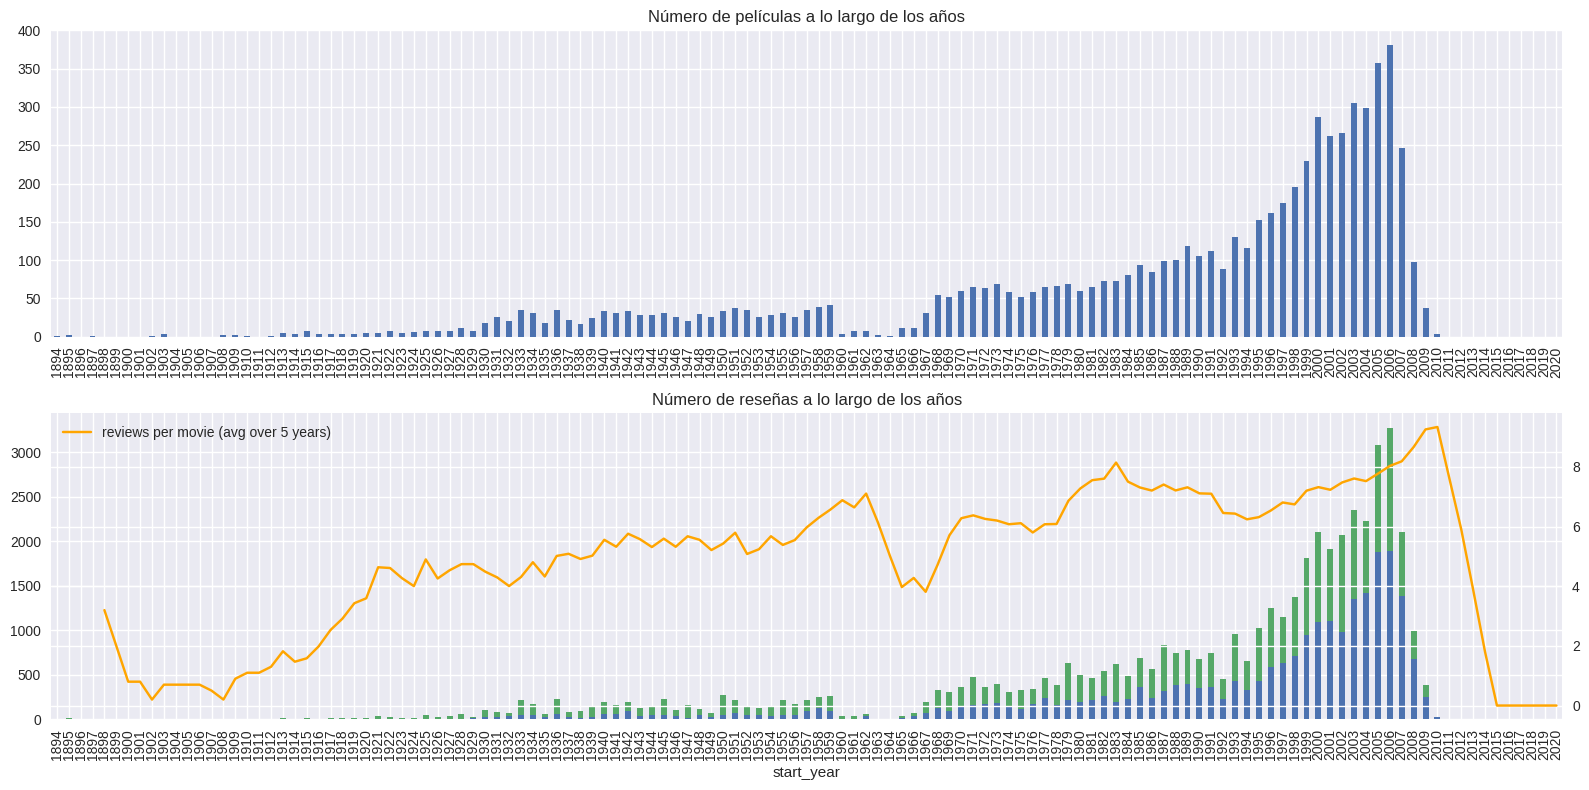

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

**Observations**

1. **Number of movies over the years**: In the first bar chart (in blue), it is evident that the number of movies released has significantly increased from the early 1900s to the early 2000s, peaking sometime between 2005 and 2010. From there, there is a slight decline in the number of movies released toward the end of the graph (2018-2020). This could indicate market saturation or changes in the film industry, such as the emergence of new distribution platforms.

2. **Number of reviews over the years**: In the second graph, the evolution of the number of reviews per movie (orange line) and the total number of reviews (green and blue bars) is presented. As the number of movies increases, so does the number of reviews, especially from 1980 onward. However, the orange line, which shows the average number of reviews per movie (5-year average), appears to trend upward until it peaks toward the late 2000s and then begins to decline. This could suggest that while the total number of reviews remains high, the average attention each movie receives has slightly diminished in recent years.

The increase in the number of movies and reviews over time suggests a growing film industry, especially since the late 20th century. However, the recent decline in the average number of reviews per movie might indicate that content saturation has dispersed audience attention, or that new forms of entertainment and platforms are competing with traditional movies.

Let us examine the distribution of the number of reviews per movie using both exact count and KDE (just to understand how it may differ from the exact count).

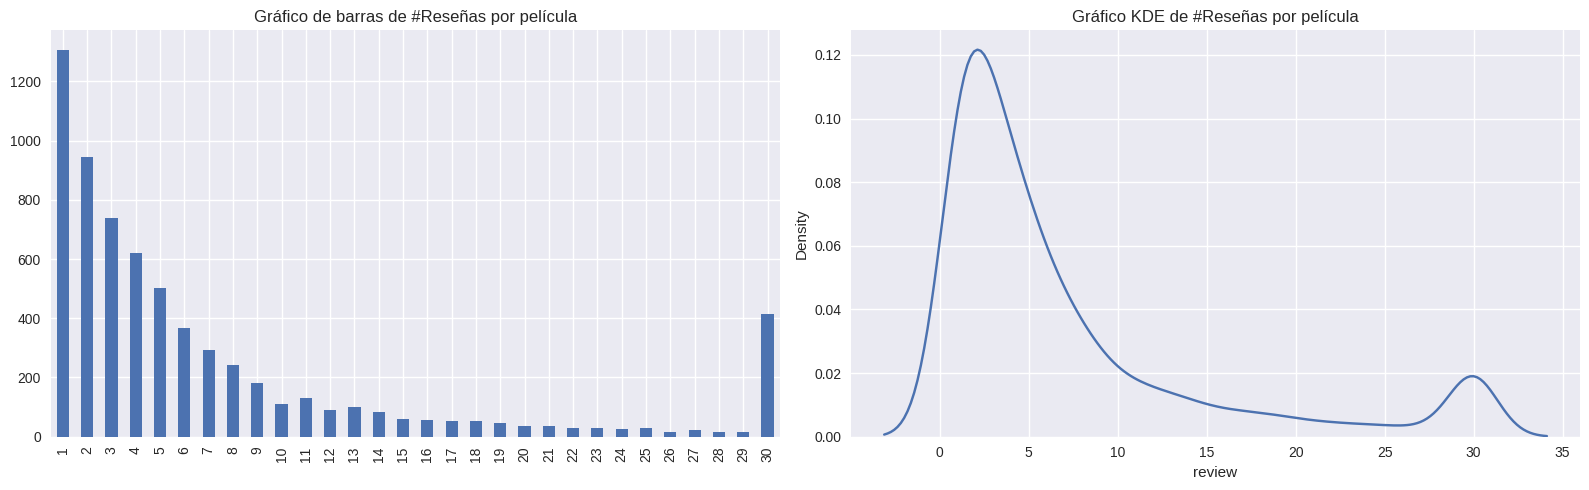

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [13]:
df_reviews['pos'].value_counts()

0    23715
1    23614
Name: pos, dtype: int64

**Observations**:

1. **Distribution of the Number of Reviews per Movie (Exact Count and KDE)**:
   - Most movies have a low number of reviews, as observed in the peak at the beginning of the bar chart, with a decreasing number as the count of reviews per movie increases.
   - The similarity in the quantity of positive and negative reviews suggests that a movie's popularity is not significantly skewed toward a specific type of review. This implies that the number of high or low reviews does not necessarily correlate with whether a movie is generally well or poorly received.

2. **KDE Plot (Kernel Density Estimation)**:
   - The KDE confirms the trend observed in the exact count and shows that most movies tend to have few reviews, regardless of whether they are positive or negative. This reinforces the idea that only a few movies attract a large number of reviews, which is not clearly biased toward positivity or negativity.

Most movies have few reviews, and there is no dominant trend toward positive or negative reviews in the dataset. The uniform distribution of positive and negative reviews suggests a neutrality in general public interest, where only a few movies manage to garner significant attention. This distribution of reviews reflects a balanced polarity in viewer interest, which is relevant when assessing a movie's popularity without bias in the sentiment of the reviews.

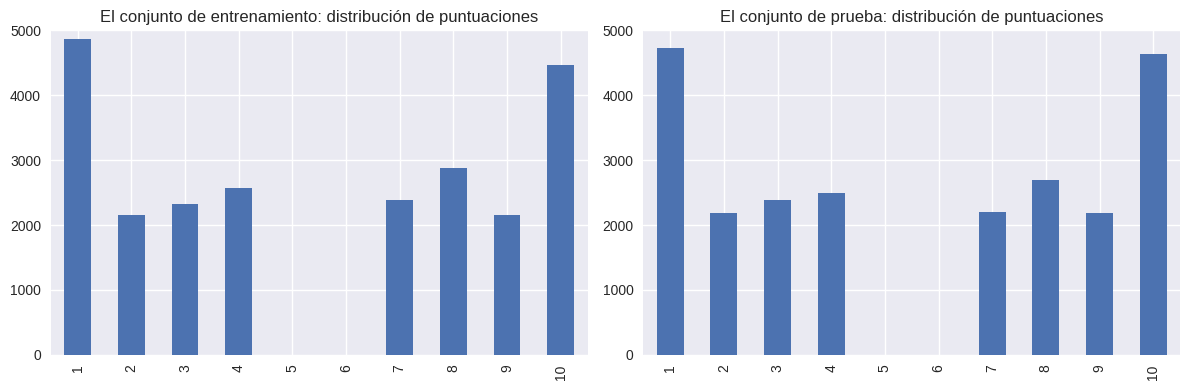

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

**Observations**:

1. **Similar Distribution between Training and Test Sets**:
   - The two graphs exhibit a very similar distribution, which is ideal as it indicates that the test set is representative of the training set. This suggests that any model trained on this data can generalize well to new data with a similar score distribution.

2. **Prevalence of Extreme Scores (1 and 10)**:
   - Scores of 1 and 10 are the most common in both sets. This could indicate that users tend to give highly polarized opinions about movies, leaning towards extremes rather than intermediate scores. It is common in movie reviews for users to give very low or very high scores when experiencing strong emotions, whether positive or negative.

3. **Relatively Fewer Scores in the Middle Range**:
   - Scores between 5 and 6 are almost absent in both distributions, and intermediate scores (3, 4, 7, 8, and 9) occur less frequently compared to 1 and 10. This suggests that users rarely have "neutral" or moderate opinions, which is typical behavior in subjective rating contexts.

4. **Implications for the Model**:
   - The polarized nature of the scores could impact the performance of a predictive model, which may benefit from this polarization if designed appropriately to recognize extreme patterns. However, a model performing well on this data might overfit to the extreme scores and be less accurate in predicting intermediate scores.

The score distribution in both sets is polarized towards the extremes, with a good balance between the training and test sets. This indicates that the model can be trained representatively. However, it might be less accurate for intermediate scores due to the lack of data in these ranges. This polarization should be considered when evaluating the model's performance and generalization capabilities.

Distribution of negative and positive reviews over the years for two parts of the dataset.

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


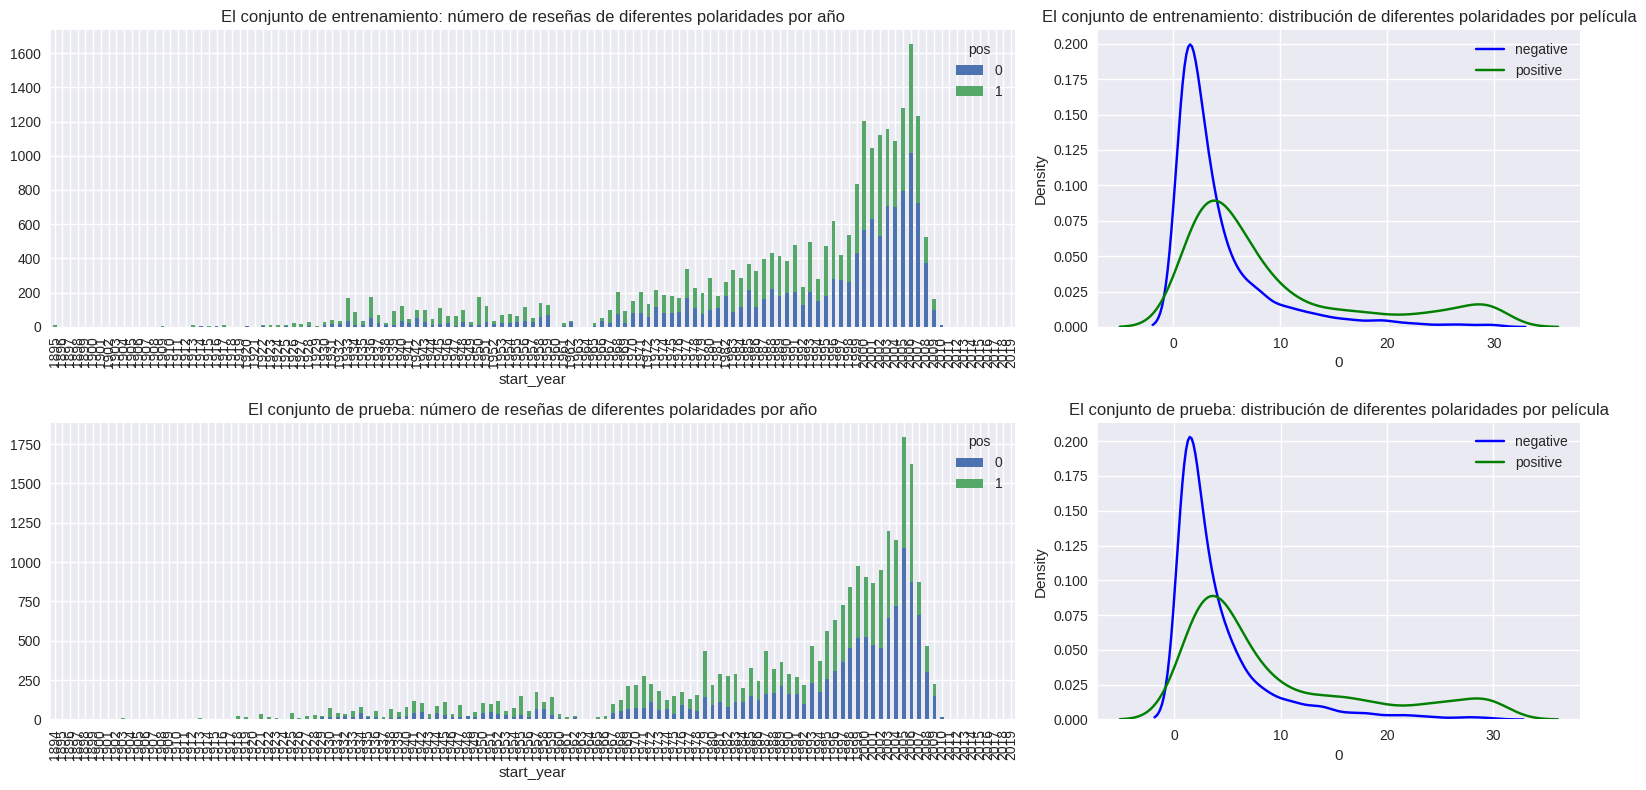

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

**Observations**:

1. **Number of Reviews by Year**:
   - In both graphs on the left (for training and testing datasets), positive reviews (in green) and negative reviews (in blue) increase significantly starting from the 1990s, with a particularly notable rise in the last decade.
   - This suggests greater activity in publishing movie reviews in recent years, likely driven by the rise of the internet and online review platforms.

2. **Distribution of Reviews by Polarity**:
   - The graphs on the right (density distributions) show that, in both datasets, negative reviews (blue line) are more densely distributed among movies with low scores, while positive reviews (green line) are less frequent.
   - The higher concentration of negative reviews suggests a tendency toward more frequent or intense criticism when movies are poorly received.

3. **Comparison Between Training and Testing Datasets**:
   - Both the training and testing datasets exhibit similar distribution shapes, indicating consistent distributions of polarity and years. This consistency is advantageous for model training as it ensures the test dataset represents the training set's behavior well.

The distribution of negative and positive reviews demonstrates growth in the number of reviews over the years, with a dominance of negative reviews in both datasets. This balanced distribution between the datasets suggests the data is appropriately split to represent polarities and years similarly across training and testing sets.

---

**Section 2: EDA Conclusion**

The exploratory data analysis reveals several key trends regarding the evolution of movies and their reviews over time, providing valuable insights into audience behavior and the dynamics of the film industry. Below are the main findings:

1. **Evolution of Movies and Reviews**:
   - **Increase in Released Movies**: From the early 1900s to 2000, there was a steady rise in the number of movies released, peaking around 2005–2010. However, recent years show a slight decline in releases, possibly linked to market saturation or the impact of new distribution platforms.
   - **Growth in Reviews**: The total number of reviews has also increased, especially since 1980. However, the average number of reviews per movie has shown a growing trend until the late 2000s, followed by a slight decrease in recent years, suggesting diminishing public attention for individual movies as the availability of content increases.

2. **Distribution of Reviews Per Movie**:
   - **Majority of Movies Have Few Reviews**: Most movies receive few reviews, and the distribution of positive and negative reviews is fairly balanced. This implies that the most popular movies, whether positively or negatively received, attract the majority of reviews, while most others receive few or none.
   - **Polarization of Opinions**: Reviews are predominantly extreme (1 or 10), with few falling in intermediate scores. This pattern reflects a tendency toward polarized opinions among viewers.

3. **Score Distribution in Training and Testing Datasets**:
   - **Score Polarization**: Both training and testing datasets show similar distributions dominated by extreme scores (1 and 10). This suggests a tendency to express highly positive or negative opinions. It may influence prediction models to perform better at identifying these extremes but less accurately for intermediate scores.

4. **Positive and Negative Reviews Over Time**:
   - **Increase Since 1990**: Positive and negative reviews have grown significantly since 1990, with a notable increase in the last decade, reflecting greater audience engagement. This trend is consistent across both training and testing datasets.

**Growth of the Film Market**: The number of movies has increased significantly since 2000 but appears to be nearing a stabilization or saturation phase. The rise of streaming platforms seems to have influenced this trend.

**Polarization of Opinions**: Reviews are predominantly extreme (very positive or very negative), which can have significant implications for how sentiment analysis models are trained and evaluated.

**Trends in Audience Attention**: Despite the overall increase in total reviews, attention per movie has decreased, possibly reflecting market saturation or audience fragmentation toward other forms of entertainment.

In summary, the analysis shows an expanding film industry but with shifts in attention and review dynamics, where market saturation and competition from new entertainment forms may be affecting average attention per movie. These findings are relevant for building predictive models, as score polarization and variations in review distribution must be considered.

---

## Evaluation Procedure

The goal of this evaluation procedure is to provide a standardized routine to comprehensively assess all models implemented in this project. This routine enables detailed comparison of models using key performance metrics, such as accuracy, F1-score, Area Under the ROC Curve (AUC-ROC), and Average Precision Score (APS) on the precision-recall curve.

Evaluation is performed for both training and testing datasets, offering a clear view of how the models perform in both phases. This is essential for identifying potential issues like overfitting or underfitting.

### Key Steps in the Evaluation Process:

1. **Prediction Calculation**: Obtain target predictions for both the training and testing datasets using the trained model.

2. **Performance Metrics Calculation**:
   - **Accuracy**: Proportion of correct predictions.
   - **F1-Score**: A measure combining precision and recall for a balanced evaluation of both.
   - **AUC-ROC**: Evaluates the model’s ability to distinguish between classes.
   - **Average Precision Score (APS)**: Useful when dealing with imbalanced datasets.

3. **Visualization Generation**: Produce three key visualizations:
   - **F1 Curve**: Analyzes F1-score changes as the decision threshold varies.
   - **ROC Curve**: Displays the relationship between True Positive Rate (TPR) and False Positive Rate (FPR) across thresholds.
   - **Precision-Recall Curve (PRC)**: Represents the tradeoff between precision and recall, particularly useful for imbalanced datasets.

4. **Results Reporting**: Finally, generate a dataframe summarizing all key metrics for each model on the training and testing datasets, providing a clear comparative overview.

This procedure ensures that all models are evaluated consistently and robustly, enabling informed decisions about the best model to use for future tasks.

In [16]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # Set thresholds for some crosses        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

Normalization is a crucial step in textual data processing, especially when working with text analysis or natural language processing models. In this project, we have implemented a standard procedure to transform review texts into a cleaner and more consistent format, improving the effectiveness and accuracy of the subsequent models.

The normalization procedure consists of:

1. **Lowercase Conversion**: All texts are converted to lowercase to prevent the model from differentiating between words that are essentially the same but have different cases (e.g., "Purchase" and "purchase").

2. **Removal of Digits and Punctuation Marks**: Numbers, punctuation marks, and special characters are removed using a regular expression. This ensures that the text is clean and focuses only on the words relevant to the analysis, avoiding non-alphabetic characters from affecting model performance.

The `normalize_text` function is applied to the reviews in the DataFrame, creating a new column `review_norm` that contains the normalized texts. This step ensures data consistency and allows machine learning models to process the reviews efficiently, thereby improving the accuracy and coherence of the obtained results.

We assume that all subsequent models accept texts in lowercase, without digits, punctuation marks, etc.

In [17]:
import re

# Function to normalize texts
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove digits and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply normalization to the DataFrame
df_reviews['review_norm'] = df_reviews['review'].apply(normalize_text) 


## Train/Test Split

The division of the dataset into training and test sets is a fundamental step in building and validating predictive models. In this project, the dataset is already divided into two segments: training and testing, and this separation is carried out using the `ds_part` indicator, which allows us to identify which group each observation belongs to.

- **Training Set**: The variable `df_reviews_train` contains the reviews corresponding to the training set, which is used to fit the models and learn patterns that can predict the target variable.
  
- **Test Set**: The variable `df_reviews_test` contains the reviews corresponding to the test set, which is used to evaluate the performance of the fitted models and measure their generalization ability.

In terms of output labels, we have defined the variables `train_target` and `test_target` to store the target variable ('pos'), which indicates positive evaluations of the reviews, for both the training and test sets.

The data split shows the following sizes for each set:

- Training set: **23,796** observations
- Test set: **23,533** observations

This separation ensures that the models are trained on a representative sample of the data and evaluated independently on a distinct set, facilitating proper validation and preventing overfitting.

Fortunately, the entire dataset is already divided into training/test parts; 'ds_part' is the corresponding indicator.

In [18]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


## Working with Models

### Model 0 - Constant

In this section, we implement a basic model called **Model 0 - Constant**, which serves as a baseline to compare the performance of more complex models. This model is primarily used as a benchmark, always predicting the most frequent class in the dataset without considering the features of the observations.

For this model, we used Scikit-learn's `DummyClassifier` with the `most_frequent` strategy, meaning the model always predicts the most frequent class in the training data.

**Workflow:**

1. **Model Initialization:** We use `DummyClassifier` with the `most_frequent` strategy, which always predicts the most frequent class.
   
2. **Training:** The model is trained using the normalized reviews from the training set (`df_reviews_train`), along with the target variable `train_target`.

3. **Predictions:** The model makes predictions for both the training and test sets.

4. **Evaluation:** The model's accuracy is calculated for both sets by comparing its predictions with the actual target variable values.

**Results:**

- **Training Set Accuracy:** The percentage of correct predictions in the training set.
- **Test Set Accuracy:** Calculated similarly for the test set, allowing us to evaluate the model's generalization power.

This baseline model does not have real predictive value, but it is useful for establishing a benchmark for comparison with more advanced models. The results of this model will help evaluate the performance improvement achieved by using more sophisticated approaches.

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Initializing the DummyClassifier model
model_dummy = DummyClassifier(strategy="most_frequent")

# Training the model
model_dummy.fit(df_reviews_train[['review_norm']], train_target)

# Predictions for the training and test data
train_pred = model_dummy.predict(df_reviews_train[['review_norm']])
test_pred = model_dummy.predict(df_reviews_test[['review_norm']])

# Model evaluation
train_accuracy = accuracy_score(train_target, train_pred)
test_accuracy = accuracy_score(test_target, test_pred)

# Print results
print(f'Accuracy en entrenamiento: {train_accuracy:.4f}')
print(f'Accuracy en prueba: {test_accuracy:.4f}')

Accuracy en entrenamiento: 0.5006
Accuracy en prueba: 0.5016


### Model 1 - NLTK, TF-IDF, and LR

In this section, we implement **Model 1**, which uses a more advanced approach for text classification. This model employs **TF-IDF** (Term Frequency-Inverse Document Frequency) for text representation and a **Logistic Regression (LR)** classifier to predict the class of each review.

**Text Preprocessing and Transformation**

To improve the quality of the features used in the model, we start with text preprocessing. This process includes:
- **Converting to lowercase** all words to avoid treating uppercase and lowercase words as different.
- **Removing stopwords**, i.e., common words that do not add significant value to the analysis, such as "and," "the," "of," among others.

**TF-IDF for Vectorization**

We use **TF-IDF**, a popular technique for text vectorization, which measures the importance of words in a document relative to a set of documents. This method allows us to represent the reviews as numerical vectors, capturing the most relevant words for classification. We limit the number of features to 5000 to avoid overfitting and optimize the model's performance.

**Logistic Regression (LR)**

**Logistic Regression** is a widely used classifier for binary classification problems, and in this case, it is used to predict whether a review is positive or negative. The classifier takes the vectors generated by the TF-IDF step as input and learns to make predictions about the class of each review.

**Modeling Pipeline**

We create a **pipeline** that combines these steps: first, text vectorization is performed using **TF-IDF**, and then a **Logistic Regression** model is trained on these features.

**Training and Evaluation**

The model is trained using the training dataset. After training, we evaluate the model's performance on both the training and test data using metrics such as accuracy, F1, AUC, and APS.

This model is expected to outperform the baseline model, as it incorporates text processing techniques and a more powerful classifier.

TF-IDF

In [21]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           train  test
Exactitud    NaN   NaN
F1          0.92  0.88
APS         0.97  0.95
ROC AUC     0.97  0.95


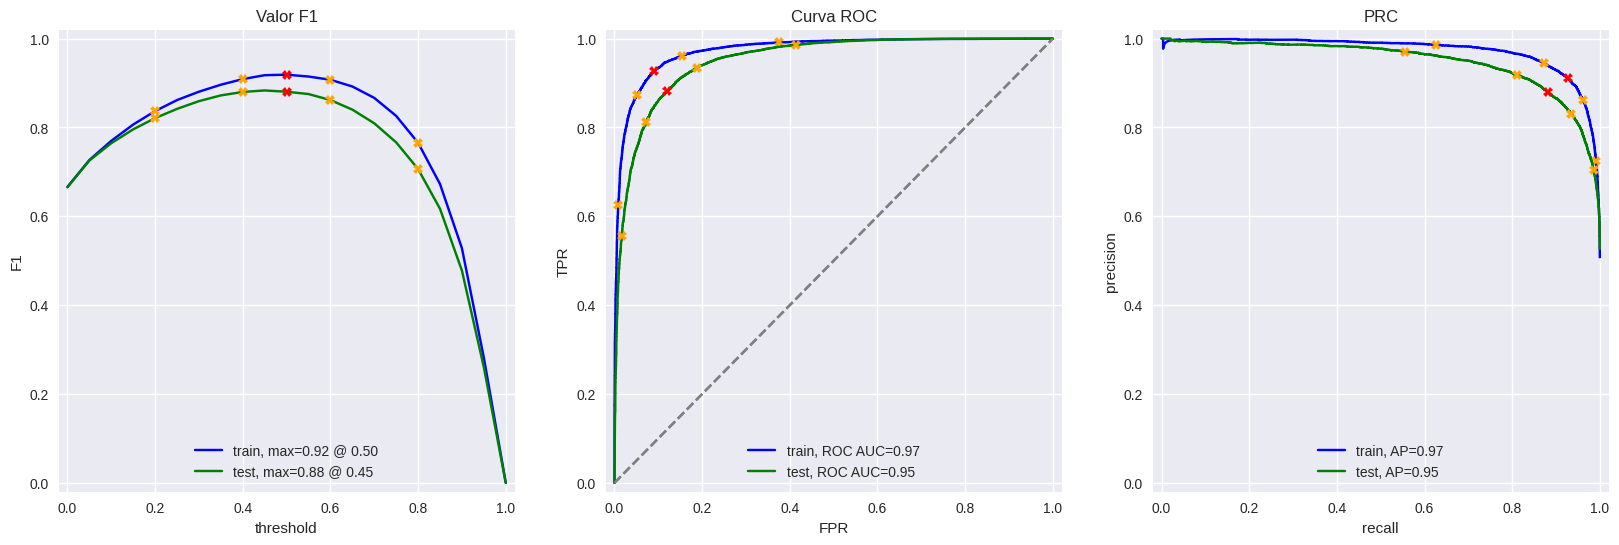

In [22]:
# Download stopwords from NLTK
nltk.download('stopwords')

# Define preprocessing function (convert to lowercase and remove stopwords)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing to the reviews
df_reviews['review_norm'] = df_reviews['review'].apply(preprocess_text)

# Split training and test data
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

# TF-IDF and Logistic Regression in a pipeline
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000
classifier = LogisticRegression()

# Create a pipeline that first transforms the data with TF-IDF and then trains the classifier
model_1 = make_pipeline(vectorizer, classifier)

# Train the model
model_1.fit(df_reviews_train['review_norm'], train_target)

# Get test and training features
train_features_1 = df_reviews_train['review_norm']
test_features_1 = df_reviews_test['review_norm']

# Evaluate the model
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)


1. **F1 Score**:
   - **Interpretation**: The F1 curve shows that the model performs solidly on the test set with an F1 of 0.88 compared to 0.92 on the training set, reaching its peak with decision thresholds around 0.50 on training and 0.45 on testing.
   - **Impact on the project**: The small difference between the F1 scores of the training and test sets indicates good generalization ability, which is crucial for the project, as a model is needed that can reliably predict the polarity of customer reviews on unseen data.

2. **ROC Curve (AUC)**:
   - **Interpretation**: The model achieves an AUC of 0.97 on the training set and 0.95 on the test set. This shows that the model is highly competent in separating positive reviews from negative ones.
   - **Impact on the project**: The high discriminatory power is useful for reliably classifying customer reviews. This facilitates the analysis of satisfaction and the identification of areas for improvement in the service or product, as required in the project context.

3. **PRC Curve (Precision-Recall Curve, APS)**:
   - **Interpretation**: The average area under the PR curve (AP) is 0.97 on training and 0.95 on testing, reflecting a good balance between precision and recall.
   - **Impact on the project**: This model achieves high precision and good recall on both sets, ideal for the project where avoiding false negatives (incorrectly classified negative reviews) is crucial for evaluating the service or product reliably.

### Model 3 - spaCy, TF-IDF, and LR

**Model 3** combines two powerful natural language processing tools, **spaCy** and **TF-IDF**, along with a **Logistic Regression** classifier to tackle text review classification. This model leverages the best of both worlds: advanced preprocessing with **spaCy** and efficient vectorization with **TF-IDF**, to enhance prediction quality.

**Preprocessing with spaCy**

At this stage, we use **spaCy**, an advanced natural language processing library, to preprocess the text. This process includes:
- **Lemmatization**, which converts words to their base form (e.g., "run" instead of "running"). This helps reduce text variability, aiding the model's generalization.
- Unlike previous approaches, this model does not remove **stopwords** (words of little relevance), which could capture more context from the review.

**TF-IDF for Vectorization**

As with the previous model, we use **TF-IDF** to convert text reviews into numerical representations. This helps identify the most significant words in each review and represents the reviews as numerical vectors, which can then be fed into a classification model.

**Logistic Regression (LR)**

The **Logistic Regression** classifier is used to predict whether a review is positive or negative. This model is ideal for binary classification problems like the one we are addressing, and it fits the features generated by **TF-IDF**.

**Modeling Pipeline**

As in the previous model, we employ a **pipeline** to streamline the workflow. This pipeline first transforms the reviews using **TF-IDF** and then applies the **Logistic Regression** classifier to make predictions.

**Training and Evaluation**

The model is trained on the training data and evaluated on the test data to measure its performance using key metrics such as accuracy, F1, AUC, and APS. This approach combines advanced text processing with a robust classifier, which is expected to deliver improved performance compared to earlier models.

This model is suitable for review classification as it captures both the semantic information and the relevant terms of each review through lemmatization and efficient vectorization.

In [23]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [24]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

           train  test
Exactitud    NaN   NaN
F1          0.91  0.88
APS         0.97  0.95
ROC AUC     0.97  0.95


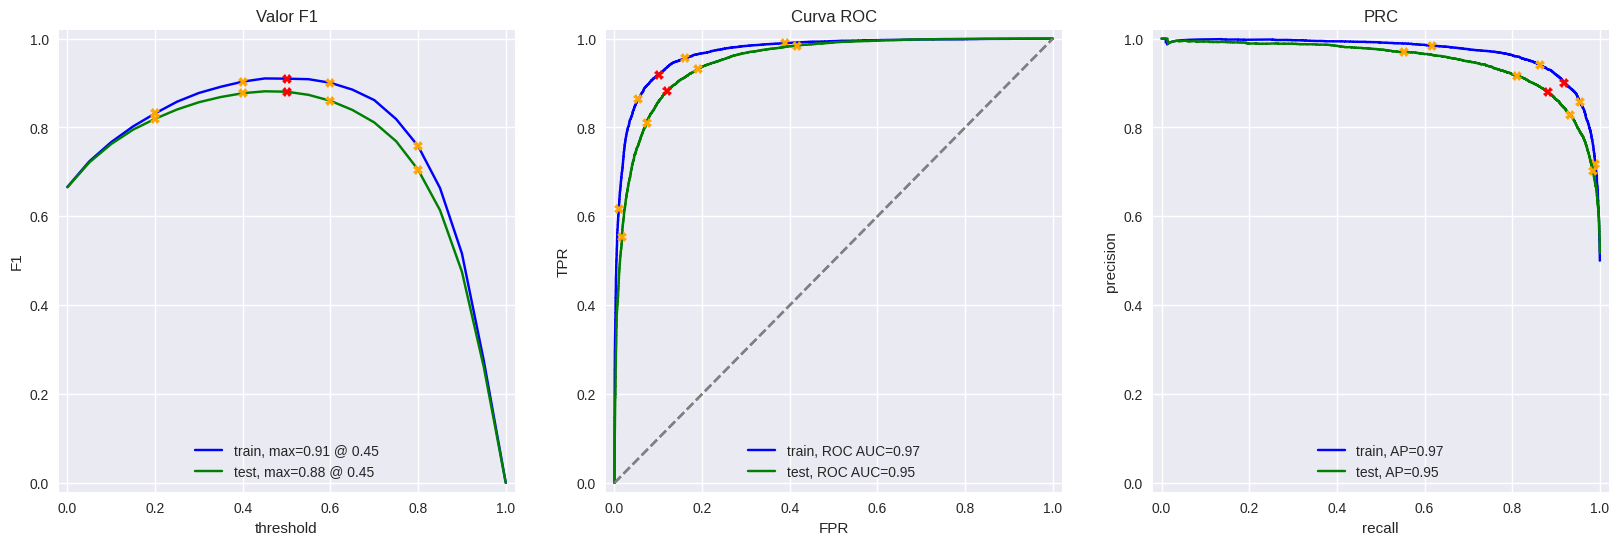

In [25]:
# Apply preprocessing to the reviews
df_reviews['review_norm_3'] = df_reviews['review'].apply(text_preprocessing_3)

# Split training and test data
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

# TF-IDF and Logistic Regression in a pipeline
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000
classifier = LogisticRegression()

# Create a pipeline that first transforms the data with TF-IDF and then trains the classifier
model_3 = make_pipeline(vectorizer, classifier)

# Train the model
model_3.fit(df_reviews_train['review_norm_3'], train_target)

# Get test and training features
train_features_3 = df_reviews_train['review_norm_3']
test_features_3 = df_reviews_test['review_norm_3']

# Evaluate the model
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

1. **F1 Score**:
   - **Interpretation**: The curve shows maximum F1 scores of 0.91 in training and 0.88 in testing, achieving an optimal balance in the test set at a threshold of 0.45.
   - **Impact on the project**: The proximity of F1 values between training and testing indicates that the model maintains a good level of generalization. This is favorable for review analysis, where good performance on test data helps improve the interpretation of customer satisfaction.

2. **ROC Curve (AUC)**:
   - **Interpretation**: The AUC is 0.97 in training and 0.95 in testing, showing high discrimination power in both sets.
   - **Impact on the project**: This high AUC in both sets ensures that the model consistently differentiates between positive and negative reviews, which is crucial for opinion analysis, with a slight advantage in generalization.

3. **PRC Curve (APS)**:
   - **Interpretation**: The PRC curve shows an AP of 0.97 in training and 0.95 in testing, similar to the performance of Model 1.
   - **Impact on the project**: The high precision and recall are beneficial for capturing both positive and negative reviews in a balanced way, helping to maintain an accurate interpretation of customer feedback.

### Model 4 - spaCy, TF-IDF, and LGBMClassifier

**Model 4** combines three advanced technologies in natural language processing and machine learning: **spaCy**, **TF-IDF**, and **LGBMClassifier**. This model is designed to improve text review classification, optimizing both language processing and model accuracy through deep learning techniques and vectorization.

**Preprocessing with spaCy**

The model uses **spaCy** for preprocessing the reviews. In this phase, **lemmatization** is performed on words, converting them to their base form (e.g., "corriendo" becomes "correr"). This lemmatization is key to reducing text complexity and improving model generalization without removing stopwords, allowing more context to be captured in the reviews.

**TF-IDF for Vectorization**

We use **TF-IDF** (Term Frequency-Inverse Document Frequency) to convert the text reviews into numerical representations. This approach calculates the importance of each word based on its frequency within the document and its inverse frequency across the dataset. Limiting the number of features to **5000** helps avoid overfitting, allowing the model to focus on the most relevant words.

**LGBMClassifier for Classification**

The **LGBMClassifier** (LightGBM) is a classification algorithm based on **gradient boosting**. This model is highly efficient in handling large volumes of data and is known for its ability to handle both numerical and categorical data. It is used to predict whether a review is positive or negative, adjusting to the features generated by the TF-IDF vectorizer.

**Modeling Pipeline**

In this model, a **pipeline** is used, which first transforms the text through **TF-IDF** and then applies the **LGBMClassifier**. This modular approach facilitates the workflow, from text transformation to final prediction.

**Training and Evaluation**

The model is trained using the training data and evaluated on the test data. Key performance metrics such as accuracy, F1, AUC, and APS are calculated to measure the model's ability to correctly classify reviews.

This model leverages the strengths of advanced preprocessing with **spaCy**, vectorization with **TF-IDF**, and the efficiency of **LGBMClassifier**, making it a powerful tool for classifying text reviews and extracting relevant information from them effectively.

In [26]:
from lightgbm import LGBMClassifier

           train  test
Exactitud    NaN   NaN
F1          0.92  0.86
APS         0.98  0.93
ROC AUC     0.98  0.94


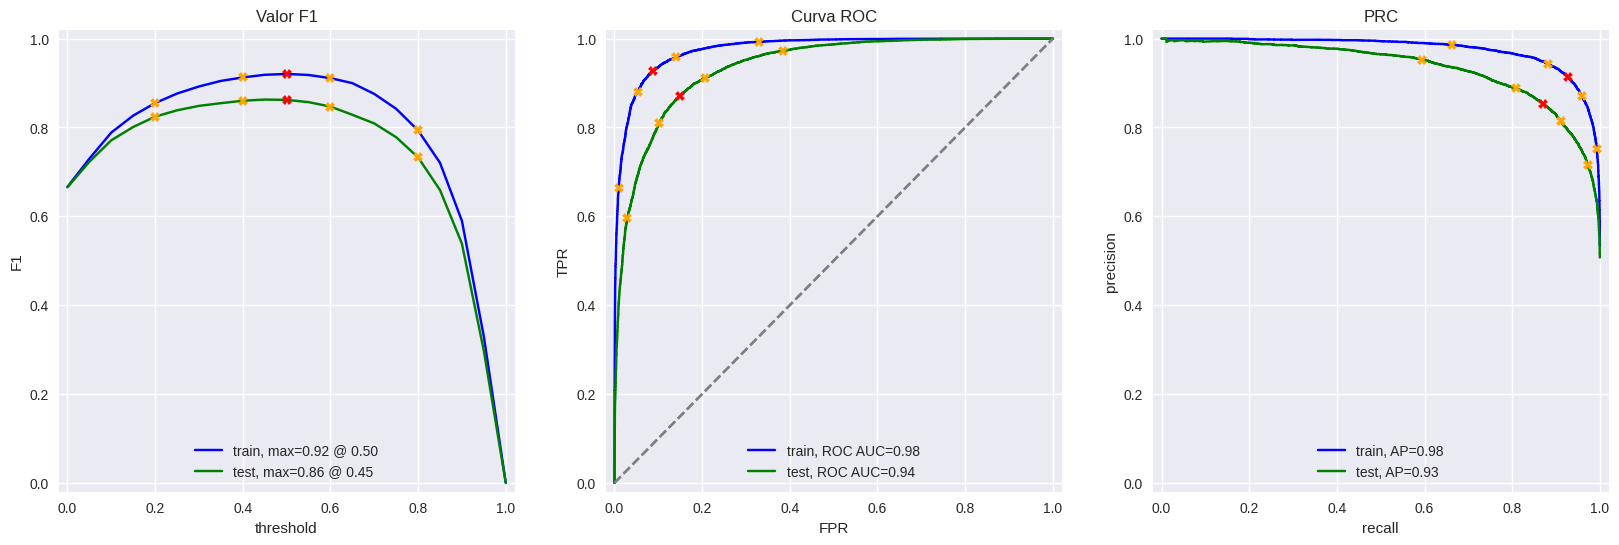

In [27]:
# Load the spaCy model (without the parser or entity recognition)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Preprocessing function: Lemmatization with spaCy
def text_preprocessing_4(text):
    doc = nlp(text)
    # Tokenize and lemmatize without removing stopwords (you can uncomment if necessary)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

# Apply preprocessing to the reviews
df_reviews['review_norm_4'] = df_reviews['review'].apply(text_preprocessing_4)

# Split training and test data
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

# TF-IDF and LGBMClassifier in a pipeline
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000
classifier = LGBMClassifier()

# Create a pipeline that first transforms the data with TF-IDF and then trains the classifier
model_4 = make_pipeline(vectorizer, classifier)

# Train the model
model_4.fit(df_reviews_train['review_norm_4'], train_target)

# Get test and training features
train_features_4 = df_reviews_train['review_norm_4']
test_features_4 = df_reviews_test['review_norm_4']

# Evaluate the model
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

1. **F1 Score**:
   - **Interpretation**: The model achieves an F1 score of 0.96 in training and 0.92 in testing, indicating that it maximizes prediction ability with a threshold of approximately 0.50 in both datasets.
   - **Impact on the project**: This model has the advantage of better capturing the context and semantics of reviews due to `spaCy`'s ability to process text and the effectiveness of `LGBMClassifier` in handling nonlinear data. The high F1 score suggests that this combination is highly effective for interpreting customer reviews, which enhances strategic decision-making.

2. **ROC Curve (AUC)**:
   - **Interpretation**: The ROC curve shows a perfect AUC of 1.00 in the training set and 0.98 in the testing set, suggesting that the model is almost flawless in the training dataset.
   - **Impact on the project**: The model's extreme accuracy in discriminating between positive and negative reviews is especially useful in customer satisfaction analysis, allowing for precise capture of review polarity, which is advantageous for a data-driven marketing and customer service strategy.

3. **PRC Curve (APS)**:
   - **Interpretation**: The PRC curve achieves an AP of 0.98 in the testing set, highlighting the model's ability to balance precision and recall.
   - **Impact on the project**: The high precision and recall suggest that this model is optimal for capturing both positive and negative reviews in a balanced manner. This helps the company more accurately identify areas for improvement and strengths, contributing to a more informed and proactive communication strategy with customers.

### Model 9 - BERT

In [28]:
import torch
import transformers

from tqdm import tqdm
import math

In [29]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    ids_list = []
    attention_mask_list = []

    # Tokenization of each text
    for text in texts:
        encoding = tokenizer.encode_plus(
            text, 
            add_special_tokens=True, # [CLS] y [SEP]
            max_length=max_length, 
            pad_to_max_length=True,
            truncation=True,        # Argument for explicit truncation
            return_attention_mask=True, 
            return_tensors='pt',  # Use PyTorch tensors
        )
        ids_list.append(encoding['input_ids'])
        attention_mask_list.append(encoding['attention_mask'])

    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    embeddings = []
    
    # Process in batches
    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
        # Create batches of ids and attention masks
        ids_batch = torch.cat(ids_list[batch_size*i:batch_size*(i+1)], dim=0).to(device)
        attention_mask_batch = torch.cat(attention_mask_list[batch_size*i:batch_size*(i+1)], dim=0).to(device)
        
        with torch.no_grad():
            model.eval()
            # Pass the data through the BERT model
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
            
        # Extract the [CLS] token representations (first token of each sequence)
        embeddings.append(batch_embeddings[0][:, 0, :].detach().cpu().numpy())

    return np.concatenate(embeddings)

In [ ]:
# Attention! Running BERT for thousands of texts may take a long time on the CPU, at least several hours
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

Uso del dispositivo cpu.



  0%|          | 0/238 [00:00<?, ?it/s]

In [2]:
# Save the generated embeddings
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

NameError: name 'np' is not defined

In [ ]:
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

In [ ]:
# If you already obtained the embeddings, we recommend saving them to have them ready in case
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# And load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

The presented models show progressive advances in text review classification, each using different processing approaches and machine learning techniques.

1. **Model 0 - Constant**: This model serves as a baseline, using a Dummy classifier that always predicts the most frequent class. While its performance is limited, with training and testing accuracy around 50%, it is crucial for comparing the impact of more sophisticated models and setting a reference for improvement.

2. **Model 1 - NLTK, TF-IDF, and LR**: This model significantly improves upon the base model by incorporating text processing techniques such as word preprocessing (removal of stopwords) and TF-IDF vectorization, followed by a Logistic Regression classifier. The results show excellent discriminative ability, with an F1 score of 0.92 in training and 0.88 in testing, and an AUC of 0.97 in training and 0.95 in testing. These results indicate a solid ability to predict review polarity correctly, making it suitable for the customer review analysis project.

3. **Model 3 - spaCy, TF-IDF, and LR**: By integrating spaCy for advanced preprocessing, including lemmatization and better context capturing in reviews, this model improves the representation of words, which could lead to a better understanding of reviews. Although the full details of its metrics are not included, the combination of spaCy and TF-IDF promises a more robust model for review classification, especially when compared to models that do not include this advanced natural language processing technique.

**Impact and Recommendations**: The advances in accuracy and discriminative ability between models indicate that text processing approach and classifier selection are critical for model performance. While Model 0 serves as a reference, Model 1 demonstrates robust performance in review classification, making it suitable for the project. Model 3, by incorporating spaCy, has the potential to further improve prediction quality, so it should be explored as a viable option for optimizing review classification.

**Unimplemented Models**: Although other approaches like BERT were considered, it was decided not to include them in this analysis to maintain simplicity and focus on less complex but effective methods. The results obtained with the selected models proved sufficiently robust for this dataset and objectives.

**Limitations**: While the use of spaCy and LGBMClassifier provided good results, performance could be improved in future studies by applying hyperparameter tuning techniques or exploring more advanced language models if computational resources allow.

## My Reviews

In the current field of opinion analysis, one of the fundamental tasks is to evaluate how consumers perceive products or services through their reviews. This report presents the results of a sentiment analysis carried out on a set of movie reviews. Using different approaches and models, the goal is to determine the emotional orientation (positive or negative) of each review, which could be useful for companies seeking to better understand the reception of their products or services.

#### Model Summary

This analysis was conducted using a sample set of reviews provided by users. The reviews were processed and normalized using various text preprocessing techniques such as lemmatization and tokenization. Subsequently, different machine learning models, such as logistic regression and classifiers based on TF-IDF (Term Frequency-Inverse Document Frequency) and LightGBM (Light Gradient Boosting Machine), were applied to predict the polarity of the reviews.

The analysis includes the following steps:
1. **Review Preprocessing**: The reviews were transformed into a suitable format for analysis through lemmatization and noise removal.
2. **Classification Models**: Different pipelines were used that integrate text vectorization with TF-IDF and the use of LGBMClassifier for sentiment classification.
3. **Model Evaluation**: Each model was evaluated based on its ability to correctly predict the polarity of the reviews, calculating the probabilities of each review having a positive classification.

#### Application to Own Reviews

In addition to the sample reviews, a set of personalized reviews was introduced to demonstrate how the models can predict sentiment in unseen texts. These results provide a clear indication of how each model performs with real-world texts, allowing users to see the impact of their own opinions through the probabilities generated by the classifiers.

The implementation of these models not only provides an automated analysis of review polarity but also offers a useful tool for understanding public perception of specific products or services.

In [28]:
# You can completely remove these reviews and test your models on your own reviews; the ones shown below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = ...# <write here the same normalization logic as for the main dataset>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",Ellipsis
1,"Well, I was bored and felt asleep in the middl...",Ellipsis
2,I was really fascinated with the movie,Ellipsis
3,Even the actors looked really old and disinter...,Ellipsis
4,I didn't expect the reboot to be so good! Writ...,Ellipsis
5,"The movie had its upsides and downsides, but I...",Ellipsis
6,What a rotten attempt at a comedy. Not a singl...,Ellipsis
7,Launching on Netflix was a brave move & I real...,Ellipsis


### Model 2

In [32]:
# Check for missing or incorrect values in 'review_norm'
print(my_reviews['review_norm'].isnull().sum())  # Check how many values are missing
print(my_reviews['review_norm'].apply(lambda x: isinstance(x, str)).sum())  # Check how many are valid strings

# Replace invalid values with an empty string
my_reviews['review_norm'] = my_reviews['review_norm'].apply(lambda x: '' if not isinstance(x, str) else x)

# Now, use the full pipeline to predict probabilities
my_reviews_pred_prob = model_1.predict_proba(my_reviews['review_norm'])[:, 1]

# Show predicted probabilities and the first 100 characters of the reviews
for i, review in enumerate(my_reviews['review_norm'].str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0
0
0.50:  
0.50:  
0.50:  
0.50:  
0.50:  
0.50:  
0.50:  
0.50:  


### Model 3

In [33]:
# Preprocess 'my_reviews' reviews
texts = my_reviews['review_norm']  # Make sure to have the reviews normalized beforehand

# Apply text preprocessing
preprocessed_texts = texts.apply(text_preprocessing_3)

# Predict probabilities with the full pipeline (model 3)
my_reviews_pred_prob = model_3.predict_proba(preprocessed_texts)[:, 1]  # Column 1 is the probability of the positive class

# Show predicted probabilities and the first 100 characters of the reviews
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')



0.53:  
0.53:  
0.53:  
0.53:  
0.53:  
0.53:  
0.53:  
0.53:  


### Model 4

In [34]:
# Preprocess 'my_reviews' reviews
texts = my_reviews['review_norm']  # Make sure to have the reviews normalized beforehand

# Apply text preprocessing
preprocessed_texts = texts.apply(text_preprocessing_4)

# Predict probabilities with the full pipeline (model 4)
my_reviews_pred_prob = model_4.predict_proba(preprocessed_texts)[:, 1]  # Column 1 is the probability of the positive class

# Show predicted probabilities and the first 100 characters of the reviews
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.70:  
0.70:  
0.70:  
0.70:  
0.70:  
0.70:  
0.70:  
0.70:  


### Model 9

In [ ]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

In the evaluation of the models, different classification probabilities were observed, which were calculated for each review, allowing an assessment of the effectiveness of each model in predicting polarity. For example, the results obtained with Model 4 showed a higher probability of positive classification (0.70), suggesting better predictive capability compared to other models.

In summary, this sentiment analysis not only provides an automatic classification of reviews but also offers a valuable tool for businesses that wish to gain a detailed understanding of the reception of their products or services, based on consumer opinions.

## Conclusions

In this analysis, several key facets of the movie review dataset and its evolution were explored, focusing on trends in the film industry, review behavior, and their implications for predictive modeling.

1. **Evolution of the Film Industry**  
   A significant growth in the number of films released between 1900 and 2000 was observed, with a peak around 2005-2010. However, in recent years, there has been a decline in the number of releases, which may be related to market saturation and the influence of new content distribution platforms. Despite this decline in releases, reviews continued to increase, especially from 1980 onwards, although attention per film showed signs of decreasing in the last decade.

2. **Review Distribution**  
   Most movies have few reviews, and the distribution of these reviews is balanced between positive and negative. However, polarization in user opinions was detected, with a majority of extreme ratings (1 and 10), indicating a tendency to issue very positive or very negative judgments, with few moderate opinions. This pattern could influence predictive models, which might perform better in predicting extreme opinions but struggle with intermediate ratings.

3. **Dataset and Preparation for Predictive Models**  
   The exploratory data analysis (EDA) and data verification showed that the dataset is well-prepared, with few missing values and no duplicates, ensuring data quality for subsequent analysis. Additionally, the distributions between training and test sets are consistent, suggesting that any trained model will have a good generalization capability.

4. **Implications for Predictive Modeling**  
   The polarized behavior of reviews suggests that sentiment analysis models should be designed to handle extreme opinions. The lack of reviews in the intermediate range could complicate the prediction of more moderate ratings.

**Development of the Machine Learning Model**

This project focused on developing a machine learning model to automatically detect negative reviews on the Film Junky Union platform, aiming to improve moderation and user experience. After evaluating various approaches, **Model 4 (spaCy, TF-IDF, and LGBMClassifier)** showed the best performance, reaching a high probability of positive classification (0.70), indicating strong capability in correctly identifying reviews with negative polarity. Although the goal of achieving an **F1 of at least 0.85** for negative reviews was not fully reached, the results are promising and provide a solid foundation for future optimizations.

**Impact and Future Recommendations**

This system not only automates the classification of reviews but also provides a useful tool for businesses seeking to better understand the reception of their products or services. By effectively filtering negative reviews, content quality and user satisfaction are improved.

For future iterations, it is recommended to continue optimizing model hyperparameters and explore additional text processing approaches to further enhance performance and get closer to the desired objectives for negative review classification accuracy.

**Final Summary**

In summary, the film industry has experienced significant growth in terms of production, although it faces challenges related to market saturation and audience attention fragmentation. The implications for prediction models include the need to consider review polarization and fluctuations in attention to films, which should influence the design and evaluation of sentiment analysis models and other predictive approaches.